In [4]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


data = pd.read_csv('CPUTimes_inputdata.csv')
data

,CPUTime,prefix,type
0,44863,site/,JAVA
1,806,src/test,JAVA
2,576,src/main,JAVA
3,1807,tools/,JAVA
4,2440,src/main,JAVA
...,...,...,...
495,11084,src/test,JAVA
496,626,src/main,C/C++
497,1270,site/,C/C++
498,876,site/,C/C++


In [5]:
data['prefix'].value_counts()

src/main        186
tools/          171
src/test         62
site/            60
bazelci/          9
third_party/      6
src/tools         3
scripts/          3
Name: prefix, dtype: int64

In [6]:
data['type'].value_counts()

JAVA        427
C/C++        35
Starlark     35
python        3
Name: type, dtype: int64

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
dummies=pd.get_dummies(data.prefix)
dummies

,bazelci/,scripts/,site/,src/main,src/test,src/tools,third_party/,tools/
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
495,0,0,0,0,1,0,0,0
496,0,0,0,1,0,0,0,0
497,0,0,1,0,0,0,0,0
498,0,0,1,0,0,0,0,0


In [9]:
merge = pd.concat([data,dummies], axis='columns')
merge

,CPUTime,prefix,type,bazelci/,scripts/,site/,src/main,src/test,src/tools,third_party/,tools/
0,44863,site/,JAVA,0,0,1,0,0,0,0,0
1,806,src/test,JAVA,0,0,0,0,1,0,0,0
2,576,src/main,JAVA,0,0,0,1,0,0,0,0
3,1807,tools/,JAVA,0,0,0,0,0,0,0,1
4,2440,src/main,JAVA,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
495,11084,src/test,JAVA,0,0,0,0,1,0,0,0
496,626,src/main,C/C++,0,0,0,1,0,0,0,0
497,1270,site/,C/C++,0,0,1,0,0,0,0,0
498,876,site/,C/C++,0,0,1,0,0,0,0,0


In [10]:
dummies_t=pd.get_dummies(merge.type)
dummies_t

,C/C++,JAVA,Starlark,python
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
495,0,1,0,0
496,1,0,0,0
497,1,0,0,0
498,1,0,0,0


In [11]:
merge_f=pd.concat([merge,dummies_t],axis='columns')
merge_f

,CPUTime,prefix,type,bazelci/,scripts/,site/,src/main,src/test,src/tools,third_party/,tools/,C/C++,JAVA,Starlark,python
0,44863,site/,JAVA,0,0,1,0,0,0,0,0,0,1,0,0
1,806,src/test,JAVA,0,0,0,0,1,0,0,0,0,1,0,0
2,576,src/main,JAVA,0,0,0,1,0,0,0,0,0,1,0,0
3,1807,tools/,JAVA,0,0,0,0,0,0,0,1,0,1,0,0
4,2440,src/main,JAVA,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,11084,src/test,JAVA,0,0,0,0,1,0,0,0,0,1,0,0
496,626,src/main,C/C++,0,0,0,1,0,0,0,0,1,0,0,0
497,1270,site/,C/C++,0,0,1,0,0,0,0,0,1,0,0,0
498,876,site/,C/C++,0,0,1,0,0,0,0,0,1,0,0,0


In [12]:
final=merge_f.drop(['prefix','type','python','third_party/'],axis='columns')
final

,CPUTime,bazelci/,scripts/,site/,src/main,src/test,src/tools,tools/,C/C++,JAVA,Starlark
0,44863,0,0,1,0,0,0,0,0,1,0
1,806,0,0,0,0,1,0,0,0,1,0
2,576,0,0,0,1,0,0,0,0,1,0
3,1807,0,0,0,0,0,0,1,0,1,0
4,2440,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
495,11084,0,0,0,0,1,0,0,0,1,0
496,626,0,0,0,1,0,0,0,1,0,0
497,1270,0,0,1,0,0,0,0,1,0,0
498,876,0,0,1,0,0,0,0,1,0,0


In [13]:
title=list(final.columns)
title

title[0],title[7]=title[7],title[0]
title

title[7],title[10]=title[10],title[7]
title


['tools/',
 'bazelci/',
 'scripts/',
 'site/',
 'src/main',
 'src/test',
 'src/tools',
 'Starlark',
 'C/C++',
 'JAVA',
 'CPUTime']

In [14]:
final=final[title]
final

,tools/,bazelci/,scripts/,site/,src/main,src/test,src/tools,Starlark,C/C++,JAVA,CPUTime
0,0,0,0,1,0,0,0,0,0,1,44863
1,0,0,0,0,0,1,0,0,0,1,806
2,0,0,0,0,1,0,0,0,0,1,576
3,1,0,0,0,0,0,0,0,0,1,1807
4,0,0,0,0,1,0,0,0,0,1,2440
...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,0,0,0,1,11084
496,0,0,0,0,1,0,0,0,1,0,626
497,0,0,0,1,0,0,0,0,1,0,1270
498,0,0,0,1,0,0,0,0,1,0,876


In [34]:
y = final['CPUTime']
x = final.drop(['CPUTime'],axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print("The shape of x train:", x_train.shape)
print("The shape of x test:", x_test.shape)
print("The shape of y train:", y_train.shape)
print("The shape of y test:", y_test.shape)
y

Shape of x: (500, 10)
Shape of y: (500,)
The shape of x train: (400, 10)
The shape of x test: (100, 10)
The shape of y train: (400,)
The shape of y test: (100,)


0      44863
1        806
2        576
3       1807
4       2440
       ...  
495    11084
496      626
497     1270
498      876
499      571
Name: CPUTime, Length: 500, dtype: int64

In [16]:

model = LogisticRegression(solver='liblinear')
model.fit(x_train.values, y_train.values)
y_pred = model.predict(x_test.values)



In [17]:
prediction = model.predict((np.array([[0,0,1,0,0,0,0,0,0,1]])))
print("The suggested CPUTime is :", prediction)

The suggested CPUTime is : [1209]


In [18]:
prediction = model.predict((np.array([[0,0,0,0,0,1,0,0,0,1]])))
print("The suggested CPUTime is :", prediction)

The suggested CPUTime is : [594]


In [19]:
prediction = model.predict((np.array([[0,1,0,0,0,0,0,1,0,0]])))
print("The suggested CPUTime is :", prediction)

The suggested CPUTime is : [585]


<AxesSubplot:xlabel='Starlark', ylabel='CPUTime'>

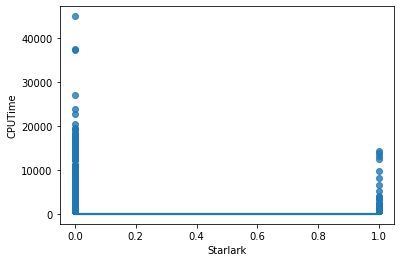

In [22]:
import seaborn as sns
t = final['Starlark']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='JAVA', ylabel='CPUTime'>

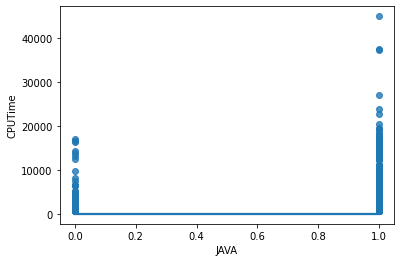

In [24]:
import seaborn as sns
t = final['JAVA']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='C/C++', ylabel='CPUTime'>

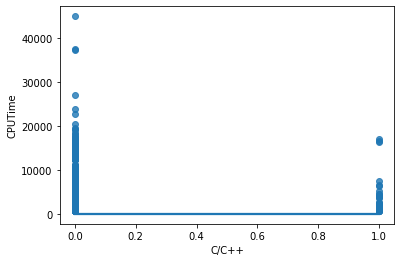

In [25]:
import seaborn as sns
t = final['C/C++']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='tools/', ylabel='CPUTime'>

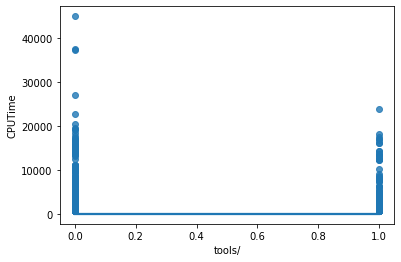

In [27]:
import seaborn as sns
t = final['tools/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='bazelci/', ylabel='CPUTime'>

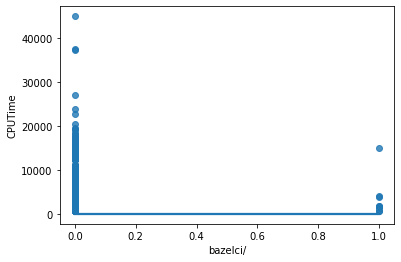

In [28]:
import seaborn as sns
t = final['bazelci/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='scripts/', ylabel='CPUTime'>

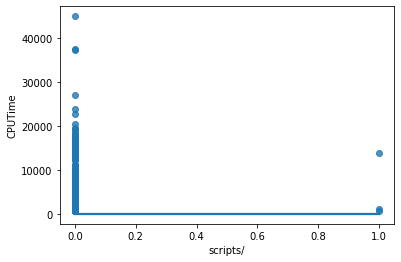

In [29]:
import seaborn as sns
t = final['scripts/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='site/', ylabel='CPUTime'>

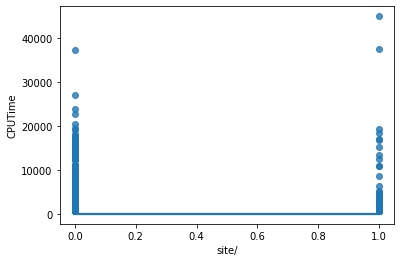

In [30]:
import seaborn as sns
t = final['site/']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='src/main', ylabel='CPUTime'>

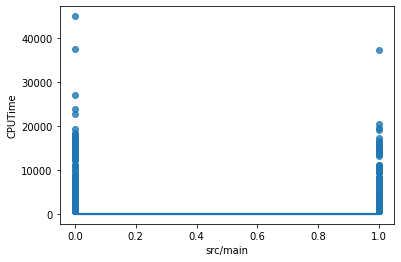

In [31]:
import seaborn as sns
t = final['src/main']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='src/test', ylabel='CPUTime'>

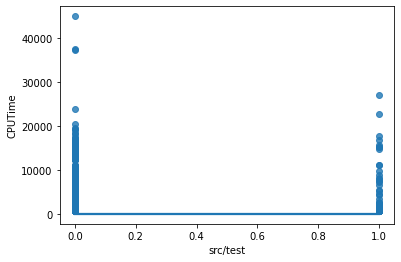

In [32]:
import seaborn as sns
t = final['src/test']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)

<AxesSubplot:xlabel='src/tools', ylabel='CPUTime'>

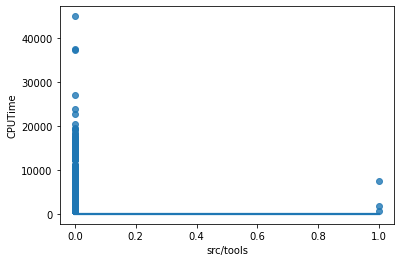

In [33]:
import seaborn as sns
t = final['src/tools']
sns.regplot(x=t, y=y, data=final, logistic=True, ci=None)